In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
L = 1.0
nx = 51
dx = L / (nx - 1)
alpha = 1.22e-3


x = numpy.linspace(0.0, L, num=nx)

T0 = numpy.zeros(nx)
T0[0] = 100.0

In [4]:
def ftcs(T0, nt, dt, dx, alpha):
    T = T0.copy()
    sigma = alpha * dt / dx**2
    for n in range(nt):
        T[1:-1] = T[1:-1] + sigma * (T[:-2] - 2 * T[1:-1] + T[2:])
        #T[0] = 100.0
        #T[-1] = 0.0
        T[-1] = T[-2]
    return T

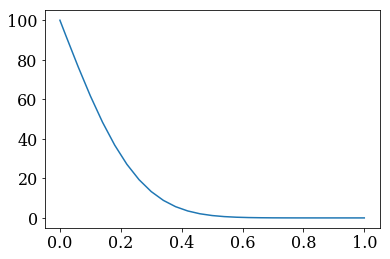

In [5]:
nt = 100
sigma = 0.5
dt = sigma * dx**2 / alpha

T = ftcs(T0, nt, dt, dx, alpha)
pyplot.plot(x, T)

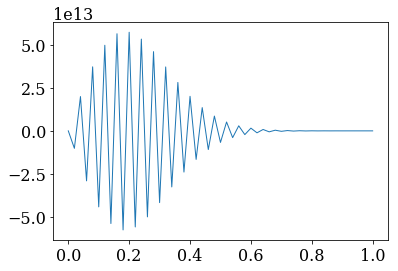

In [6]:
nt = 100
sigma = 0.6
dt = sigma * dx**2 / alpha

T = ftcs(T0, nt, dt, dx, alpha)
pyplot.plot(x, T, lw=1);

In [7]:
def ftcs_mixed_bcs(T0, nt, dt, dx, alpha):
    T = T0.copy()
    sigma = alpha * dt / dx**2
    for n in range(nt):
        T[1:-1] = T[1:-1] + sigma * (T[:-2] - 2 * T[1:-1] + T[2:])
        # Neumann condition with a zero-gradient value.
        T[-1] = T[-2]
    return T

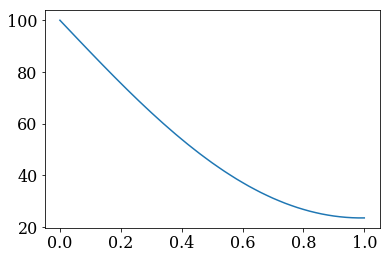

In [8]:
nt = 1000
sigma = 0.5
dt = sigma * dx**2 / alpha

T = ftcs_mixed_bcs(T0, nt, dt, dx, alpha)
pyplot.plot(x, T);